In [5]:
# %matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import tqdm

In [6]:
df_list=[]
for filenumber in tqdm.tqdm(range(1,37)):
# Open the .root file
    filePath=f'/media/shounak/New Volume/PROJECT_DATA/ROOT_FILES/JetNtuple_RunIISummer16_13TeV_MC_{filenumber}.root'
    file = uproot.open(filePath)
# Access the tree structure
    tree = file['AK4jets/jetTree']
# Define the columns you want to read
    columns = ['isPhysG', 'isPhysUDS','QG_mult','QG_ptD','QG_axis2','jetPt','jetEta','jetQGl','jetMass','jetGirth','jetArea','jetMult','jetChargedHadronMult','jetNeutralHadronMult']
    df=tree.arrays(columns, library='pd')
    df_list.append(df)

100%|██████████| 36/36 [00:07<00:00,  5.01it/s]


In [7]:
df=pd.concat(df_list,ignore_index='true')

In [8]:
binning=[]
hist_columns = ['QG_mult','QG_ptD','QG_axis2','jetPt','jetEta','jetMass','jetGirth','jetArea','jetMult','jetChargedHadronMult','jetNeutralHadronMult']
for col in hist_columns:
    print(f"minimum of {col} ",min(df[col]),f"maximum of {col} ",max(df[col]))
    binning.append(np.arange(min(df[col]),max(df[col]),(max(df[col])-min(df[col]))/20))
    


minimum of QG_mult  0 maximum of QG_mult  131
minimum of QG_ptD  0.0 maximum of QG_ptD  1.0
minimum of QG_axis2  0.0 maximum of QG_axis2  0.21065926551818848
minimum of jetPt  30.000017166137695 maximum of jetPt  7701.63818359375
minimum of jetEta  -2.499999761581421 maximum of jetEta  2.499998092651367
minimum of jetMass  -0.10547177493572235 maximum of jetMass  626.60400390625
minimum of jetGirth  1.647569843044039e-05 maximum of jetGirth  0.37604618072509766
minimum of jetArea  0.05983985960483551 maximum of jetArea  0.9474644660949707
minimum of jetMult  1 maximum of jetMult  172
minimum of jetChargedHadronMult  0 maximum of jetChargedHadronMult  125
minimum of jetNeutralHadronMult  0 maximum of jetNeutralHadronMult  14


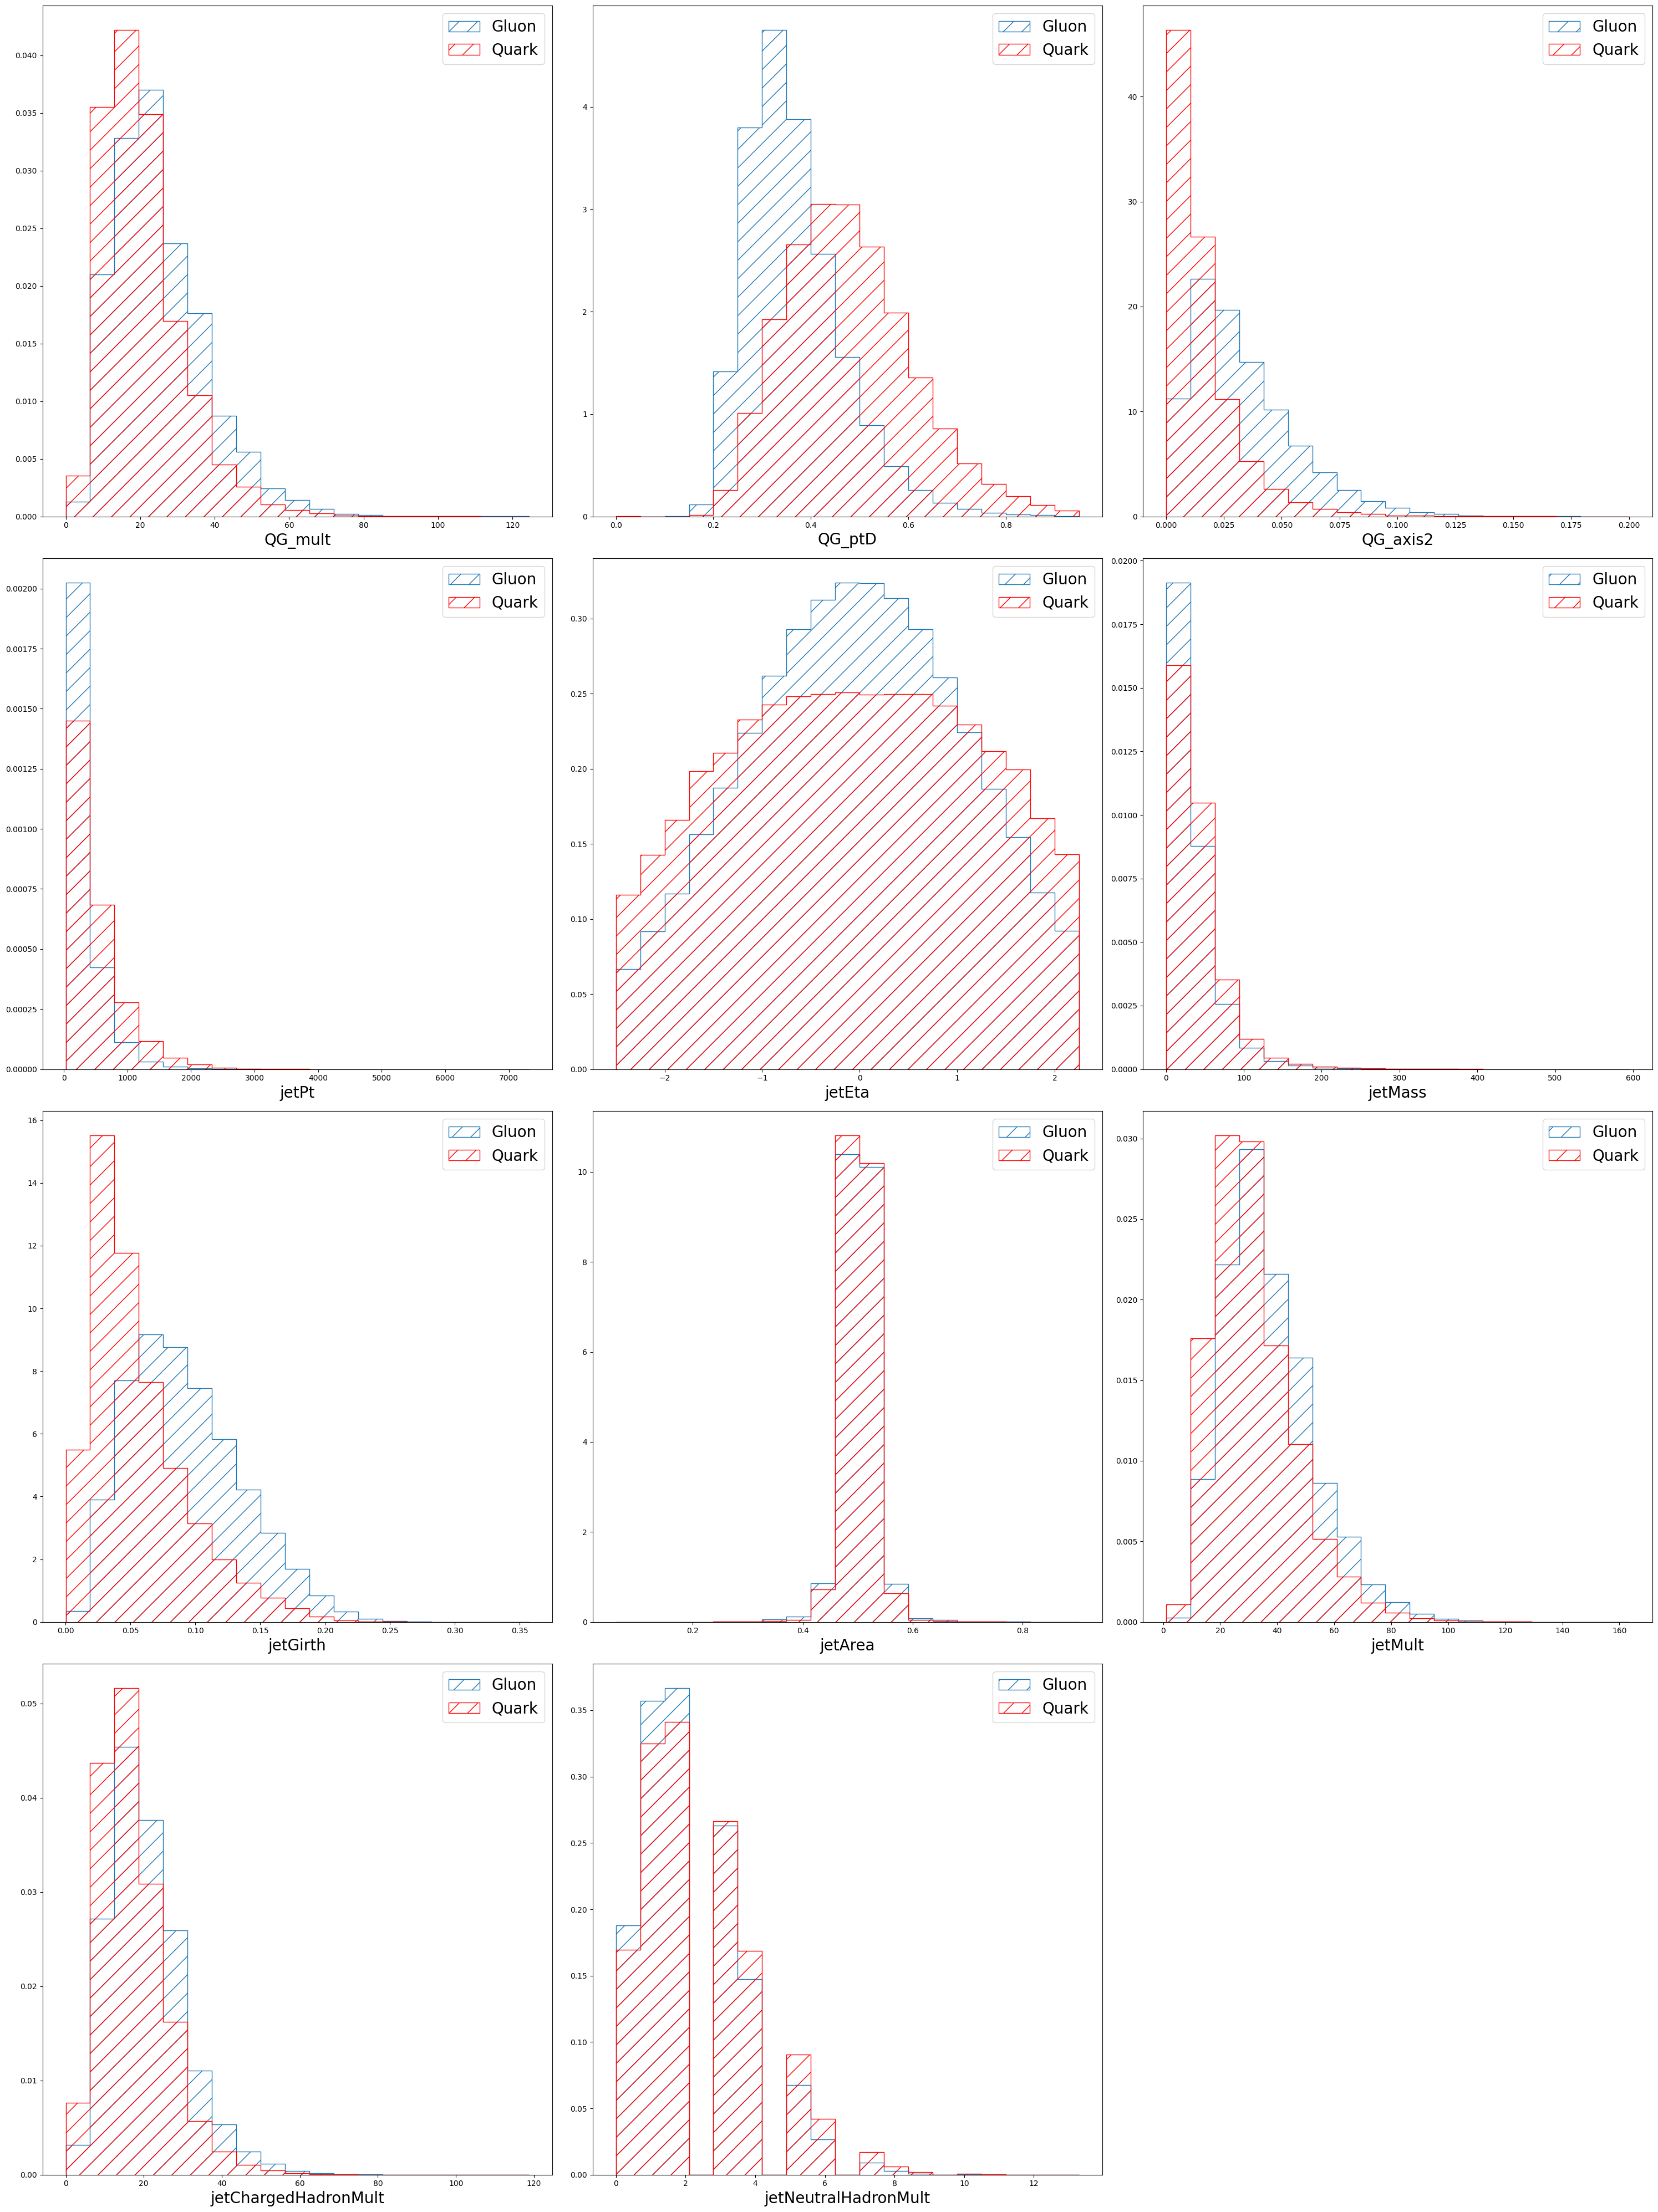

In [9]:
import matplotlib.pyplot as plt
import numpy as np

n = len(hist_columns)  # number of subplots
n_cols = 3   # number of columns of subplots
n_rows = n // n_cols if n % n_cols == 0 else n // n_cols + 1  # number of rows of subplots

fig, axs = plt.subplots(n_rows, n_cols, figsize=(30, n_rows*10))

for ind, column in enumerate(hist_columns):
    row = ind // n_cols
    col = ind % n_cols
    axs[row, col].hist( df[df.isPhysG==1][column], bins=binning[ind], alpha=1, label='Gluon', density=1, histtype='step',hatch='/' )
    axs[row, col].hist( df[df.isPhysUDS==1][column], bins=binning[ind], alpha=1,  color='red', label='Quark', density=1,  hatch='/',histtype='step' )
    axs[row, col].set_xlabel(column, fontsize=20)
    axs[row, col].legend(prop = { "size": 20 })

if n % n_cols != 0:
    for j in range(n, n_rows*n_cols):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()
